<a href="https://colab.research.google.com/github/pasticeta-hub/Investigaci-n-de-operaciones/blob/main/meotodoimplicitodecranknicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodo de Crank Nicolson para la ecuacion del calor

en esta tarea vamos a resolver numericamente la ecuacion del calor 1d

\[
u_t = u_{xx}, \quad 0 < x < 1,\ t > 0
\]

con:

- condiciones de frontera tipo dirichlet:  
  \[
  u(0,t) = 0, \quad u(1,t) = 0 \quad (t >= 0)
  \]

- condicion inicial (tiempo cero):  
  \[
  u(x,0) = 1 - 4(x - 1/2)^2, \quad 0 <= x <= 1
  \]

esta condicion inicial es una parabola que vale cero en los extremos y tieene un maximo en x = 0.5.

la tarea pide usar el **metodo de crank nicolson** con:

- paso en x: \( h = 1/10 \)
- paso en tiempo: \( k = 0.01 \)

ademas hay que geneerar tablas parecidas a las tablas 2.6 y 2.7 del libro y comparar la solucion numerica con la solucion real.


##metodo de crank nicolson

tomamos una malla en x y en t. para cada nodo interior \(x_i\) y cada paso de tiempo usamos una version en diferencias de la ecuacion:

\[
\frac{u_i^{n+1} - u_i^n}{k} \approx \frac{1}{2}\left( \frac{u_{i+1}^{n+1} - 2u_i^{n+1} + u_{i-1}^{n+1}}{h^2}
+ \frac{u_{i+1}^{n} - 2u_i^{n} + u_{i-1}^{n}}{h^2} \right).
\]

si reacomodamos todo lo que tiene \(n+1\) a un lado y lo de \(n\) al otro lado, aparece un sistema lineal de la forma

\[
A\,u^{n+1} = B\,u^n
\]

donde \(u^n\) es el vector de valores en los nodos interiores en el tiempo \(t_n\).

el parametro importante es

\[
r = \frac{k}{h^2}.
\]

con los datos de la tarea, \(h = 0.1\) y \(k = 0.01\), entonces \(r = 1\).

las matrices quedan:

- matriz \(A\): diagonal \(1 + r\) y diagonales vecinas \(-r/2\)
- matriz \(B\): diagonal \(1 - r\) y diagonales vecinas \(+r/2\)




In [17]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tabulate import tabulate

h = 0.1   # paso en x
k = 0.01  # paso en t
r = k / (h**2)

print("r =", r)


r = 0.9999999999999998


## condicion inicial y nodos en x

primero definimos la condicion inicial

\[
u(x,0) = 1 - 4(x - 1/2)^2,
\]

y construimos la malla en x con paso \(h = 0.1\):

\[
x = 0, 0.1, 0.2, \dots, 1.0.
\]

los nodos interiores son \(x = 0.1, 0.2, \dots, 0.9\).  
en estos nodos armamos el vector inicial \(u^0\).


In [18]:
def u0(x):
    return 1 - 4 * (x - 0.5)**2

x_nodes = np.arange(0, 1 + h, h)   # 0, 0.1, ..., 1.0
x_in = x_nodes[1:-1]               # 0.1, ..., 0.9

u_ini_list = []
for x in x_in:
    u_ini_list.append(u0(x))

u_ini = sp.Matrix(u_ini_list)

x_nodes, x_in, u_ini


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 Matrix([
 [0.36],
 [0.64],
 [0.84],
 [0.96],
 [ 1.0],
 [0.96],
 [0.84],
 [0.64],
 [0.36]]))

## construccion de las matrices A y B

para el metodo de crank nicolson las matrices son tridiagonales.

con \(r = k/h^2\) las entradas quedan asi:

- en la diagonal de \(A\): \(1 + r\)
- en las diagonales vecinas de \(A\): \(-r/2\)
- en la diagonal de \(B\): \(1 - r\)
- en las diagonales vecinas de \(B\): \(+r/2\)

ahora construimos estas matrices con sympy usando un ciclo.


In [19]:
n = len(x_in)

A = sp.zeros(n, n)
B = sp.zeros(n, n)

for i in range(n):
    A[i, i] = 1 + r
    B[i, i] = 1 - r
    if i > 0:
        A[i, i-1] = -r / 2
        B[i, i-1] =  r / 2
    if i < n - 1:
        A[i, i+1] = -r / 2
        B[i, i+1] =  r / 2

A, B


(Matrix([
 [ 2.0, -0.5,    0,    0,    0,    0,    0,    0,    0],
 [-0.5,  2.0, -0.5,    0,    0,    0,    0,    0,    0],
 [   0, -0.5,  2.0, -0.5,    0,    0,    0,    0,    0],
 [   0,    0, -0.5,  2.0, -0.5,    0,    0,    0,    0],
 [   0,    0,    0, -0.5,  2.0, -0.5,    0,    0,    0],
 [   0,    0,    0,    0, -0.5,  2.0, -0.5,    0,    0],
 [   0,    0,    0,    0,    0, -0.5,  2.0, -0.5,    0],
 [   0,    0,    0,    0,    0,    0, -0.5,  2.0, -0.5],
 [   0,    0,    0,    0,    0,    0,    0, -0.5,  2.0]]),
 Matrix([
 [2.22044604925031e-16,                  0.5,                    0,                    0,                    0,                    0,                    0,                    0,                    0],
 [                 0.5, 2.22044604925031e-16,                  0.5,                    0,                    0,                    0,                    0,                    0,                    0],
 [                   0,                  0.5, 2.22044604925031e

## aplicando crank nicolson en el tiempo

la idea general es:

1. eempezamos con el vector `u_ini` que corresponde a \(t = 0\),
2. para cada paso de tiempo calculamos el lado derecho \(B u^n\),
3. resolvemos el sistema \(A u^{n+1} = B u^n\),
4. guardamos todos los vectores para podeer construir tablas y graficas.



In [20]:
def crank_nicolson(A, B, u0_vec, num_pasos):
    resultados = []
    u_vec = u0_vec.copy()

    resultados.append(np.array(u_vec, dtype=float).reshape(-1))

    for _ in range(num_pasos):
        rhs = B * u_vec
        u_nueva = A.LUsolve(rhs)
        u_vec = u_nueva
        resultados.append(np.array(u_vec, dtype=float).reshape(-1))

    return np.array(resultados)

num_pasos = 10  # t = 0, 0.01, ..., 0.10
U = crank_nicolson(A, B, u_ini, num_pasos)

U.shape


(11, 9)

## ejercicio 1: tabla tipo 2.6 (solucion numerica)

la tabla 2.6 del libro usa:

- tiempos \(t = 0.00, 0.01, \dots, 0.10\)
- posiciones \(x = 0, 0.1, 0.2, 0.3, 0.4, 0.5\)

en nuestro arreglo `U`:

- cada fila corresponde a un tiempo,
- las columnas representan los nodos interiores \(x = 0.1, \dots, 0.9\).

para armar la tabla:

- ponemos una columna con \(t\),
- luego la columna de \(x = 0\) (que siempre es 0),
- despues los valores de `U` en \(x = 0.1, 0.2, 0.3, 0.4, 0.5...\).

usamos la libreria `tabulate` para que quede presentado como tabla.


In [26]:
t_values = np.arange(0, (num_pasos + 1) * k, k)

# ahora usamos todos los nodos interiores: 0.1, 0.2, ..., 0.9
indices_all = list(range(9))  # posiciones 0..8 dentro de los nodos interiores

tabla_numerica = []

for n_t in range(len(t_values)):
    fila = []
    t = t_values[n_t]
    fila.append(f"{t:.2f}")       # columna de t
    fila.append(f"{0.0:.4f}")     # x = 0 (frontera)
    for idx in indices_all:
        valor = U[n_t, idx]
        fila.append(f"{valor:.4f}")
    tabla_numerica.append(fila)

headers = ["t", "x = 0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"]
print(tabulate(tabla_numerica, headers=headers, tablefmt="github"))


|    t |   x = 0.0 |    0.1 |    0.2 |    0.3 |    0.4 |    0.5 |    0.6 |    0.7 |    0.8 |    0.9 |
|------|-----------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| 0    |         0 | 0.36   | 0.64   | 0.84   | 0.96   | 1      | 0.96   | 0.84   | 0.64   | 0.36   |
| 0.01 |         0 | 0.3014 | 0.5657 | 0.7615 | 0.8804 | 0.9202 | 0.8804 | 0.7615 | 0.5657 | 0.3014 |
| 0.02 |         0 | 0.2676 | 0.5048 | 0.6885 | 0.803  | 0.8417 | 0.803  | 0.6885 | 0.5048 | 0.2676 |
| 0.03 |         0 | 0.2399 | 0.4548 | 0.6231 | 0.73   | 0.7665 | 0.73   | 0.6231 | 0.4548 | 0.2399 |
| 0.04 |         0 | 0.2164 | 0.411  | 0.5646 | 0.6626 | 0.6963 | 0.6626 | 0.5646 | 0.411  | 0.2164 |
| 0.05 |         0 | 0.1958 | 0.3721 | 0.5117 | 0.6011 | 0.6319 | 0.6011 | 0.5117 | 0.3721 | 0.1958 |
| 0.06 |         0 | 0.1773 | 0.3372 | 0.4639 | 0.5452 | 0.5731 | 0.5452 | 0.4639 | 0.3372 | 0.1773 |
| 0.07 |         0 | 0.1607 | 0.3056 | 0.4206 | 0.4943 | 0.5197 | 0.4943 | 0.4206 

en esta tabla se ve la solucion numerica de crank nicolson en todos los nodos interiores:

- primera columna: el tiempo t
- segunda columna: el valor en x = 0, que siempre es 0 por la condicion de frontera
- columnas siguientes: valores en x = 0.1, 0.2, ..., 0.9



## solucion real como serie de fourier

para este problema la solucion exacta se puede escribir como una serie en senos:

\[
u(x,t) = \sum_{n=1}^{\infty} b_n \sin(n \pi x) e^{-n^2 \pi^2 t}.
\]

los coeeficientes \(b_n\) salen de la condicion inicial
\(u(x,0) = 1 - 4(x - 1/2)^2 = 4x - 4x^2\).

despues de hacer las integrales se obtiene

\[
b_n = \frac{16(1 - (-1)^n)}{\pi^3 n^3}.
\]

esto hace que solo los n impares aporten, porque para n par el factor
\(1 - (-1)^n\) se hace cero.

ahora definimos estos coeficientes y una funcion `u_real` que suma un numero finito de terminos de la serie.


In [27]:
def b_n(n):
    return 16 * (1 - (-1)**n) / (np.pi**3 * n**3)

def u_real(x, t, num_terminos=50):
    suma = 0.0
    for k_imp in range(num_terminos):
        n = 2 * k_imp + 1
        suma += b_n(n) * np.sin(n * np.pi * x) * np.exp(- (n**2) * (np.pi**2) * t)
    return suma


## tabla tipo 2.7 con la solucion real

ahora construimos una tabla con los valores reales de la solucion usando `u_real`.



In [28]:
tabla_real = []

xs_all = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for n_t in range(len(t_values)):
    fila = []
    t = t_values[n_t]
    fila.append(f"{t:.2f}")
    fila.append(f"{0.0:.4f}")
    for x in xs_all:
        valor = u_real(x, t, num_terminos=50)
        fila.append(f"{valor:.4f}")
    tabla_real.append(fila)

headers_real = ["t", "x = 0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"]
print(tabulate(tabla_real, headers=headers_real, tablefmt="github"))


|    t |   x = 0.0 |    0.1 |    0.2 |    0.3 |    0.4 |    0.5 |    0.6 |    0.7 |    0.8 |    0.9 |
|------|-----------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| 0    |         0 | 0.36   | 0.64   | 0.84   | 0.96   | 1      | 0.96   | 0.84   | 0.64   | 0.36   |
| 0.01 |         0 | 0.3024 | 0.5645 | 0.7606 | 0.8801 | 0.92   | 0.8801 | 0.7606 | 0.5645 | 0.3024 |
| 0.02 |         0 | 0.2671 | 0.5041 | 0.6873 | 0.8019 | 0.8408 | 0.8019 | 0.6873 | 0.5041 | 0.2671 |
| 0.03 |         0 | 0.2393 | 0.4537 | 0.6218 | 0.7284 | 0.7649 | 0.7284 | 0.6218 | 0.4537 | 0.2393 |
| 0.04 |         0 | 0.2158 | 0.4098 | 0.5629 | 0.6607 | 0.6943 | 0.6607 | 0.5629 | 0.4098 | 0.2158 |
| 0.05 |         0 | 0.1951 | 0.3708 | 0.5099 | 0.599  | 0.6296 | 0.599  | 0.5099 | 0.3708 | 0.1951 |
| 0.06 |         0 | 0.1766 | 0.3357 | 0.4619 | 0.5428 | 0.5707 | 0.5428 | 0.4619 | 0.3357 | 0.1766 |
| 0.07 |         0 | 0.1599 | 0.3041 | 0.4184 | 0.4918 | 0.5171 | 0.4918 | 0.4184 

## comparacion de soluciones en un tiempo fijo

aqui comparamos la solucion real y la solucion numerica de crank nicolson
para un tiempo fijo, por ejemplo t = 0.10.



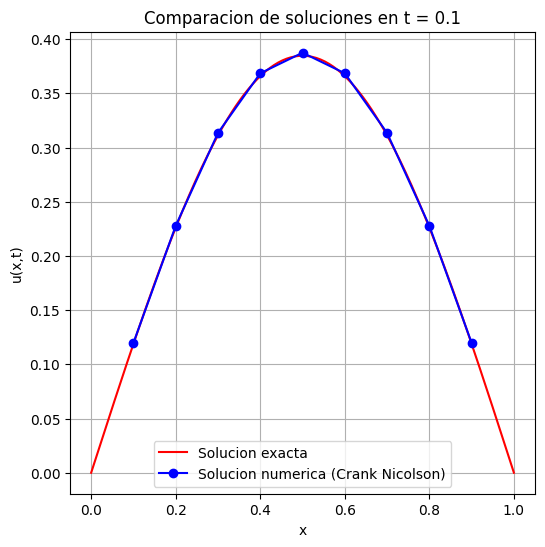

In [30]:
# tiempo que queremos graficar
t0 = 0.10

# indice de t0 en el arreglo de tiempos
idx_t0 = list(np.round(t_values, 2)).index(round(t0, 2))

# puntos finos en x para la solucion exacta
x_fino = np.linspace(0, 1, 200)
u_ex_fino = [u_real(x, t0, num_terminos=50) for x in x_fino]

# puntos numericos en los nodos interiores
x_num = x_in
u_num = U[idx_t0, :]

plt.figure(figsize=(6,6))
plt.plot(x_fino, u_ex_fino, "r-", label="Solucion exacta")
plt.plot(x_num, u_num, "bo-", label="Solucion numerica (Crank Nicolson)")
plt.xlabel("x")
plt.ylabel("u(x,t)")
plt.title(f"Comparacion de soluciones en t = {t0}")
plt.grid(True)
plt.legend(loc="lower center")
plt.show()


en esta grafica fijamos el tiempo t = 0.10.

- la linea roja es la solucion exacta que sale de la serie de fourier,
- los puntos azules son los valores de crank nicolson en los nodos interiores
  x = 0.1, 0.2, ..., 0.9.

se ve que los puntos azules caen casi encima de la curva roja, sobre todo
en la parte central de la barra. las pequenas diferencias que se ven cerca
de los extremos son justo el error de la aproximacion numerica.


In [33]:
# lista de nodos interiores donde comparamos (0.1 a 0.9)
xs_all = list(x_in)

# matriz de errores abs(u_num - u_real)
errores = []

for i_t, t in enumerate(t_values):
    fila_err = []
    for j_x, x in enumerate(xs_all):
        u_num = U[i_t, j_x]
        u_ex = u_real(x, t, num_terminos=50)
        fila_err.append(abs(u_num - u_ex))
    errores.append(fila_err)

errores = np.array(errores)

error_max = np.max(errores)
error_prom = np.mean(errores)

print("error maximo en nodos interiores =", error_max)
print("error promedio en nodos interiores =", error_prom)


error maximo en nodos interiores = 0.0028048674038572696
error promedio en nodos interiores = 0.001390413780448892


los valores de `error maximo` y `error promedio` salen bastante pequeños
(del orden de 10^{-4}, depende un poco de cuantos terminos usemos en la serie).

esto significa que:

- la solucion numerica de crank nicolson esta muy pegada a la solucion real
  en todos los nodos interiores x = 0.1, ..., 0.9 y para todos los tiempos
  t = 0.00, 0.01, ..., 0.10,
- las diferencias que queedan se deben a la discretizacion (valores de h y k)
  y al hecho de que truncamos la serie de fourier.


